In [1]:
from IPython.display import Image, display

import operator
from typing import Annotated, Any
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END

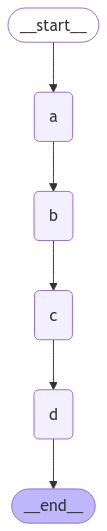

In [9]:
class State(TypedDict):
    state: str
    

class ReturnNodeValue:
    def __init__(self, node_secret: str):
        self._value = node_secret

    def __call__(self, state: State) -> Any:
        print(f"""Adding {self._value} to {state["state"]}""")
        return {"state": [self._value]}
    

builder = StateGraph(State)

builder.add_node("a", ReturnNodeValue("I am A"))
builder.add_node("b", ReturnNodeValue("I am B"))
builder.add_node("c", ReturnNodeValue("I am C"))
builder.add_node("d", ReturnNodeValue("I am D"))

builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("b", "c")
builder.add_edge("c", "d")
builder.add_edge("d", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [10]:
graph.invoke({"state": []})

Adding I am A to []
Adding I am B to ['I am A']
Adding I am C to ['I am B']
Adding I am D to ['I am C']


{'state': ['I am D']}

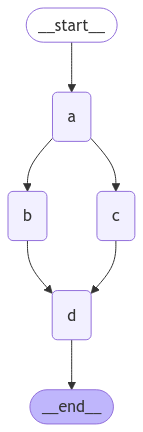

In [11]:
class State(TypedDict):
    state: str
    

class ReturnNodeValue:
    def __init__(self, node_secret: str):
        self._value = node_secret

    def __call__(self, state: State) -> Any:
        print(f"""Adding {self._value} to {state["state"]}""")
        return {"state": [self._value]}
    

builder = StateGraph(State)

builder.add_node("a", ReturnNodeValue("I am A"))
builder.add_node("b", ReturnNodeValue("I am B"))
builder.add_node("c", ReturnNodeValue("I am C"))
builder.add_node("d", ReturnNodeValue("I am D"))

builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "d")
builder.add_edge("c", "d")
builder.add_edge("d", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [13]:
from langgraph.errors import InvalidUpdateError

In [15]:
try:
    graph.invoke({"state": []})
except InvalidUpdateError as ive:
    print(f"InvalidUpdateError: {ive}")

Adding I am A to []
Adding I am B to ['I am A']
Adding I am C to ['I am A']
InvalidUpdateError: At key 'state': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_CONCURRENT_GRAPH_UPDATE


In [18]:
from typing import Annotated, List

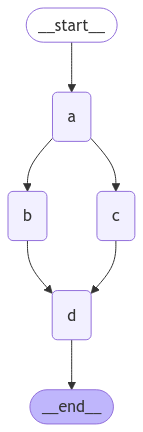

In [22]:
class State(TypedDict):
    state: Annotated[List, operator.add]
    

class ReturnNodeValue:
    def __init__(self, node_secret: str):
        self._value = node_secret

    def __call__(self, state: State) -> Any:
        print(f"""Adding {self._value} to {state["state"]}""")
        return {"state": [self._value]}
    

builder = StateGraph(State)

builder.add_node("a", ReturnNodeValue("I am A"))
builder.add_node("b", ReturnNodeValue("I am B"))
builder.add_node("c", ReturnNodeValue("I am C"))
builder.add_node("d", ReturnNodeValue("I am D"))

builder.add_edge(START, "a")
builder.add_edge("a", "b")
builder.add_edge("a", "c")
builder.add_edge("b", "d")
builder.add_edge("c", "d")
builder.add_edge("d", END)

graph = builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
try:
    graph.invoke({"state": []})
except InvalidUpdateError as ive:
    print(f"InvalidUpdateError: {ive}")

Adding I am A to []
Adding I am C to ['I am A']
Adding I am B to ['I am A']
Adding I am D to ['I am A', 'I am B', 'I am C']
